OASIS INFOBYTE

TASK NO:5 SALES PRICE PREDICTION


NAME : SAHIL SHUKLA

In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
         

In [9]:
df = pd.read_csv('/content/Advertising.csv')

In [10]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
df.shape

(200, 5)

In [12]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [13]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


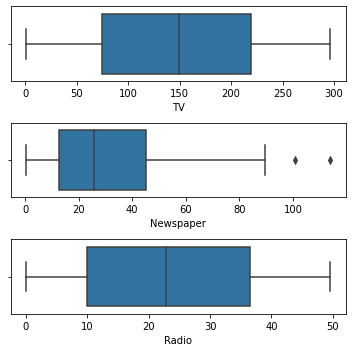

In [15]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()
     

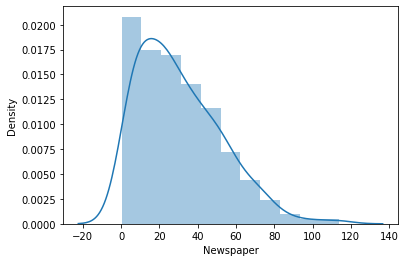

In [16]:
sns.distplot(df['Newspaper'])

In [17]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [18]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [19]:
data = df.copy()

In [20]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

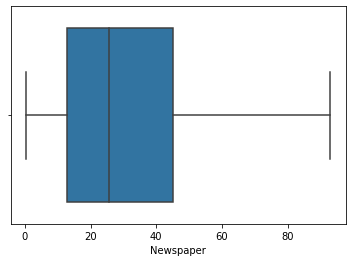

In [21]:
sns.boxplot(data['Newspaper'])

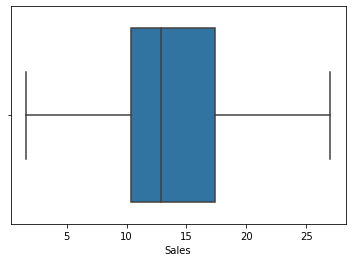

In [22]:
sns.boxplot(data['Sales']);

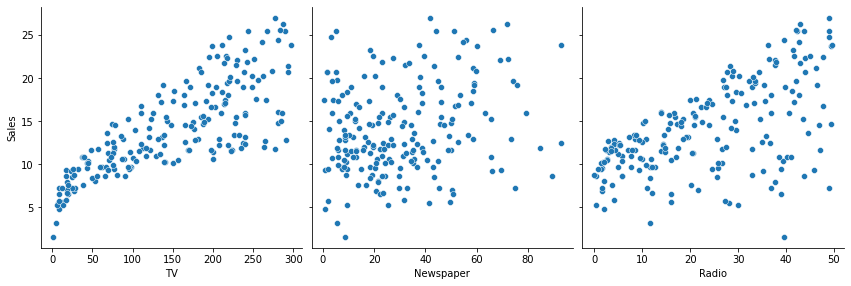

In [23]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()
     

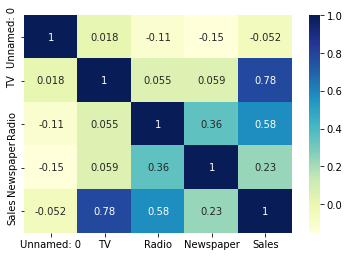

In [24]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [25]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [26]:
print(important_features)

['TV', 'Radio', 'Sales']


In [27]:
X = data['TV']
y = data['Sales']

In [28]:
X = X.values.reshape(-1,1)

In [29]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [30]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [31]:
print(X.shape,y.shape)

(200, 1) (200,)


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [33]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [34]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [37]:
knn_train_pred = knn.predict(X_train)

In [38]:
knn_test_pred = knn.predict(X_test)

In [39]:
print(knn_train_pred, knn_test_pred)

[12.96 10.36 12.96 13.8   6.4  16.28 17.96 18.12 20.96 17.96 14.04 18.1
 13.7  13.08 13.88 11.84 10.36 17.54 11.6   9.28 14.92 14.04 14.42 13.18
  7.34 17.32 13.8  17.18 17.02 18.44 13.7  16.32 19.86  6.34 15.78 12.96
 13.08 12.14 16.32 10.88 12.4  16.62 18.1  16.28 17.02 10.5   6.26 16.42
 16.34  6.26 14.92 19.74 16.08 13.18 12.66 17.54 13.18 14.02 17.28 18.04
 10.12  6.62  5.92 10.26 18.1  15.78 10.5  10.86 18.44  8.68 14.1   9.72
 17.28 20.48 16.94 16.32 16.32 19.86 18.44 10.36  5.92 19.16 16.52 15.28
 19.38 11.16  7.62 18.72 13.08 17.02 13.4  12.54 12.96  5.92 13.6  16.76
 16.08 13.8  10.36 21.56 15.04 19.38 16.36 10.88  9.58 14.94 16.28  9.16
 12.34 15.5  15.3  12.34  7.34 17.28 12.54 16.36  6.62 18.44 10.88 16.32
 12.54 11.12 13.7  10.08 13.66 19.16 11.26 13.18 16.62 16.76 18.12 16.42
 12.38 15.12] [18.12  7.34 12.54 14.92  9.5  12.96  8.9   7.92 18.12 20.48 17.1   6.62
 12.96 17.28  6.34 11.84 17.28 16.08 16.42  5.92 18.12 16.36 20.48 12.34
 19.74 12.96 17.28  5.92 17.32 18.12 1

In [40]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [41]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance


In [42]:
svr = SVR().fit(X_train,y_train)
svr


SVR()

In [43]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)
     

In [44]:
print(svr_train_pred,svr_test_pred)

[10.84974954  8.97949583 10.91139209 13.86910561  7.47716985 15.63146598
 17.01190061 15.67032287 17.08593031 16.98339296 12.98775046 16.35049918
 12.3053928  13.35604016 15.00000016 11.85567029  8.97348466 15.48957783
 11.71315048  8.31464224 16.18332111 13.07146539 16.36083618 12.6919326
  7.71897965 16.87407377 13.79455228 15.37566658 15.98925335 17.06733093
 12.33677792 16.96802674 17.12820128  7.39855465 15.09540891 10.82900387
 13.36783837 10.76090383 14.47429751 10.48969405 11.36291629 16.73644875
 16.35817024 15.63631659 15.88824915 10.36031405  7.52190112 16.81222127
 17.00200219  7.51880919 16.15322728 16.69362662 16.08771177 12.85584564
 12.12086907 15.48957783 12.66430331 14.66560162 17.12994007 16.81966066
  9.2952509   7.68424244  7.3072739  10.14095442 16.46993644 15.09540891
 10.40562477 11.96626771 17.04273451  8.16335446 14.75489967  9.39923387
 17.12960579 16.7835868  15.28590723 14.42582624 14.52790889 17.12361969
 17.03824782  9.0639531   7.32939485 16.1713596  17.

In [45]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)
     

R2: 0.5727644740486824
RMSE: 3.9294805783343274


In [46]:
Results.head()
     

,Model,Train R2,Test R2,Test RMSE,Variance
0,Support Vector Machine,0.53322,0.572764,3.929481,-0.039545


In [50]:
import statsmodels.api as sm

In [48]:
X_train_constant = sm.add_constant(X_train)

In [51]:
model = sm.OLS(y_train, X_train_constant).fit()

In [52]:

model.params

const    7.638506
x1       0.042424
dtype: float64

In [53]:
print(model.summary())
     

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     155.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           4.70e-24
Time:                        14:57:51   Log-Likelihood:                -346.99
No. Observations:                 134   AIC:                             698.0
Df Residuals:                     132   BIC:                             703.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6385      0.582     13.121      0.0

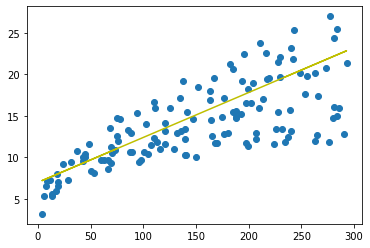

In [54]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [55]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

115    1.775426
38     0.633005
86     1.124517
3      4.434206
158   -0.834870
         ...   
43    -3.516103
35    -7.171263
54     1.416619
79    -1.559730
165   -5.687015
Name: Sales, Length: 134, dtype: float64

In [61]:
y_train_pred

array([10.82457391,  9.46699484, 10.87548312, 14.06579393,  8.13487039,
       15.60579768, 18.4058045 , 20.06459642, 18.17671303, 18.47368345,
       13.12821589, 19.38580689, 12.29669871, 13.54397447, 15.06700849,
       11.77487926,  9.46275241, 15.48276708, 11.62215161,  8.97487243,
       16.11488983, 13.22579188, 16.29731452, 12.77185138,  8.43608324,
       16.96337675, 13.99367254, 15.38519108, 15.92822271, 17.40034751,
       12.33488062, 17.141559  , 17.89246992,  8.00759735, 15.14761475,
       10.80760417, 13.55670178, 10.75245252, 14.61731042, 10.54033079,
       11.27427198, 18.90641178, 19.37732202, 15.61004011, 15.83488915,
       10.4427548 ,  8.19850691, 18.79186605, 17.21792282,  8.19426447,
       16.08519279, 16.69186093, 16.02155627, 12.97124581, 12.07609211,
       15.48276708, 12.7379119 , 14.78276537, 17.8161061 , 16.87428562,
        9.68760144,  8.39790133,  7.81244536, 10.28154228, 19.25004898,
       15.14761475, 10.47669427, 11.89790986, 17.32398368,  8.85

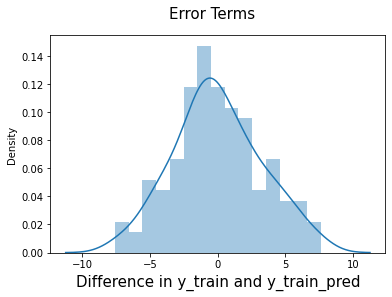

In [62]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()
     

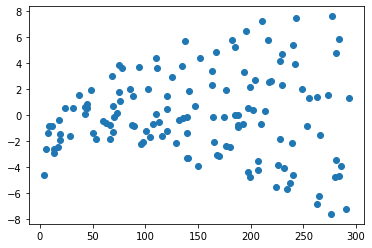

In [63]:
plt.scatter(X_train, res)
plt.show()
     

In [64]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
     

In [65]:
y_pred

array([20.09429346,  8.47002272, 11.4736664 , 16.11488983, 10.02275377,
       10.84154365, 10.07790542,  8.77547801, 20.21308163, 16.77670962,
       17.07368004,  8.36820429, 10.87972556, 17.81186366,  8.00335492,
       11.76215195, 17.74398471, 16.07670792, 18.7239871 ,  7.66820258,
       19.83974739, 16.5773152 , 16.83610371, 13.70094455, 16.74701258,
       10.87972556, 17.82459096,  7.94820327, 16.98458892, 19.92883852,
       17.2773169 ,  7.99487005, 10.83305878,  8.69911419, 16.69610337,
       12.61063887,  9.25063068,  9.3142672 , 16.99307379, 16.33549643,
       14.90579597, 13.20033727, 11.71972761, 18.96156343,  8.80517505,
       14.95670519, 18.2827739 ,  8.43184081, 15.74579802, 10.51487619,
       13.98943011,  8.72456879,  8.35547699, 17.71004523,  9.25911555,
        8.70335662, 11.63487891, 11.04093807, 12.86094251, 15.0924631 ,
       18.19368277, 14.28215809, 17.07368004, 13.33609518, 16.90398266,
       16.9082251 ])

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.3768635934386464

In [68]:
r2 = r2_score(y_test, y_pred)
r2

0.6844820285548252

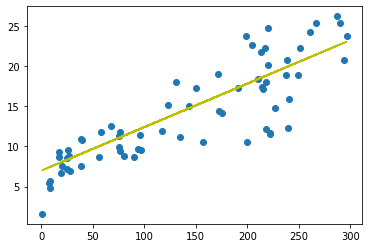

In [69]:

plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()